In [1]:
from sklearn import metrics

In [4]:
y_actual = ["c","h","f","c","h","f","c","h","h"]
y_pred =   ["c","c","f","h","h","c","c","f","f"]

In [5]:
cm = metrics.confusion_matrix(y_actual,y_pred, labels=["c","h","f"])
print(cm)


[[2 1 0]
 [1 1 2]
 [1 0 1]]


In [6]:
cm = metrics.classification_report(y_actual,y_pred, labels=["c","h","f"])
print(cm)


              precision    recall  f1-score   support

           c       0.50      0.67      0.57         3
           h       0.50      0.25      0.33         4
           f       0.33      0.50      0.40         2

    accuracy                           0.44         9
   macro avg       0.44      0.47      0.43         9
weighted avg       0.46      0.44      0.43         9



In [7]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)

In [8]:
# Step 2: Generate Synthetic Dataset (for easy visualization)
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0,
    n_informative=2, n_clusters_per_class=1, random_state=42
)

In [11]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [12]:
# Step 3: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Step 4: Predictions
y_pred = model.predict(X_test)

In [14]:
# Step 5: Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Model Performance Metrics")
print("----------------------------")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}")

📊 Model Performance Metrics
----------------------------
Accuracy  : 0.88
Precision : 0.77
Recall    : 1.00
F1 Score  : 0.87


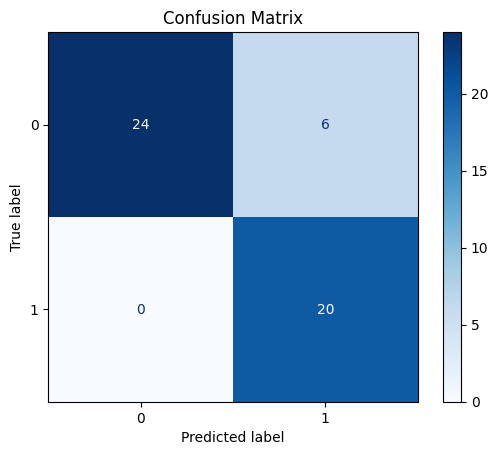

In [15]:
# Step 6: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Step 7: Decision Boundary Visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

In [17]:
# Predict class for each point in mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

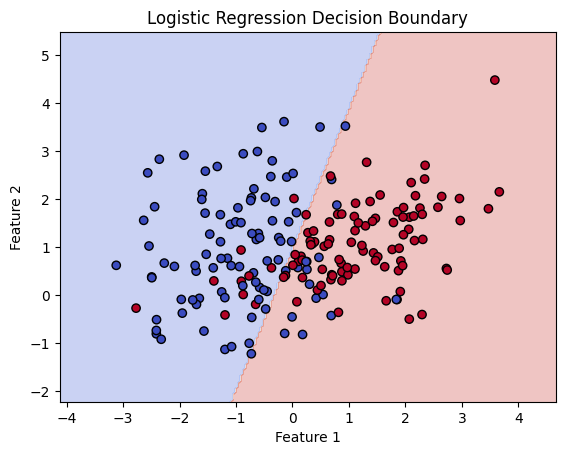

In [18]:
# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()